# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

In [3]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten

# Load the dataset

# Split the dataset to train and test

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.reshape(-1,)
y_train[:1]

array([[6]], dtype=uint8)

# Separate features and Labels

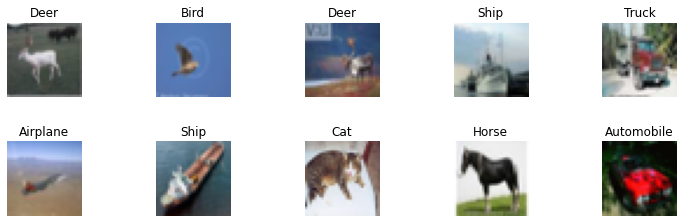

In [8]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
sample = np.random.choice(np.arange(50000),10)
 

fig, axes = plt.subplots(2, 5, figsize=(12,4))
axes = axes.ravel()

for i in range(10):
    idx = sample[i]
    axes[i].imshow(x_train[idx])
    axes[i].set_title(labels[y_train[idx][0]])
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Visualize some images

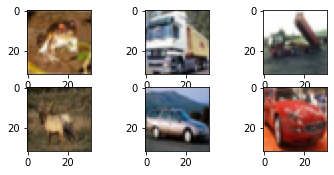

In [37]:
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [9]:
print('Nummber of images - ',x_train.shape[0])
print('Dimensions of an image - ',x_train.shape[1:3])
print('Number of channels - ',x_train.shape[-1])

Nummber of images -  50000
Dimensions of an image -  (32, 32)
Number of channels -  3


# Data Preprocessing

# Normalizing the data

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

# One hot encoding

In [11]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# Build a ANN model

In [12]:
len_flatten = np.product(x_train.shape[1:])
x_train_flatten = x_train.reshape(x_train.shape[0],len_flatten)
x_test_flatten = x_test.reshape(x_test.shape[0],len_flatten)

# Using optimiser ADAM

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

## Activation funcation - Relu & Softmax

ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector

In [13]:
model = Sequential()

model.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

In [14]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x_train_flatten, y_train, epochs=10,validation_split=.3) 

Epoch 1/10
1094/1094 [==============================] - 26s 23ms/step - loss: 2.0945 - accuracy: 0.1975 - val_loss: 1.8850 - val_accuracy: 0.2963
Epoch 2/10
1094/1094 [==============================] - 22s 20ms/step - loss: 1.8355 - accuracy: 0.3261 - val_loss: 1.7880 - val_accuracy: 0.3463
Epoch 3/10
1094/1094 [==============================] - 22s 21ms/step - loss: 1.7489 - accuracy: 0.3621 - val_loss: 1.7287 - val_accuracy: 0.3725
Epoch 4/10
1094/1094 [==============================] - 22s 20ms/step - loss: 1.6829 - accuracy: 0.3889 - val_loss: 1.6895 - val_accuracy: 0.3961
Epoch 5/10
1094/1094 [==============================] - 23s 21ms/step - loss: 1.6179 - accuracy: 0.4124 - val_loss: 1.6019 - val_accuracy: 0.4276
Epoch 6/10
1094/1094 [==============================] - 22s 20ms/step - loss: 1.5553 - accuracy: 0.4367 - val_loss: 1.6150 - val_accuracy: 0.4168
Epoch 7/10
1094/1094 [==============================] - 21s 20ms/step - loss: 1.5143 - accuracy: 0.4538 - val_loss: 1.5816 -

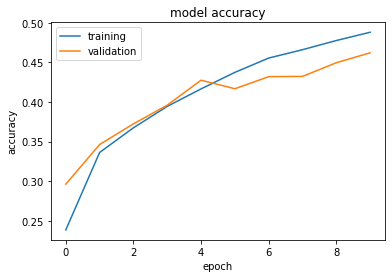

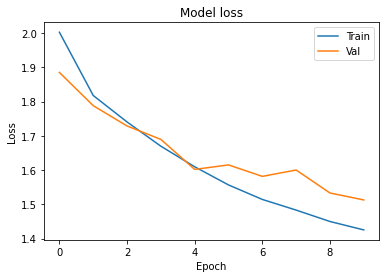

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [17]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4979 - accuracy: 0.4761


[1.4979497194290161, 0.47609999775886536]

In [18]:
model.evaluate(x_train_flatten,y_train)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.4151 - accuracy: 0.4917


[1.415075421333313, 0.4916599988937378]

# Using optimiser SGD
SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum.

The default learning rate is 0.01 and no momentum is used by default.

## Activation funcation - Relu & Softmax

ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector

In [19]:
model2 = Sequential()

model2.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model2.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model2.add(Dense(units=128, activation='relu',kernel_initializer='uniform'))
model2.add(Dense(units=32, activation='relu',kernel_initializer='uniform'))
model2.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history2= model2.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

Epoch 1/10
1094/1094 [==============================] - 26s 23ms/step - loss: 2.2998 - accuracy: 0.1250 - val_loss: 2.2667 - val_accuracy: 0.1291
Epoch 2/10
1094/1094 [==============================] - 30s 27ms/step - loss: 2.1897 - accuracy: 0.1710 - val_loss: 2.1154 - val_accuracy: 0.2017
Epoch 3/10
1094/1094 [==============================] - 30s 27ms/step - loss: 2.0196 - accuracy: 0.2319 - val_loss: 1.9333 - val_accuracy: 0.2758
Epoch 4/10
1094/1094 [==============================] - 32s 29ms/step - loss: 1.9128 - accuracy: 0.2810 - val_loss: 1.8651 - val_accuracy: 0.3058
Epoch 5/10
1094/1094 [==============================] - 31s 29ms/step - loss: 1.8390 - accuracy: 0.3197 - val_loss: 1.8106 - val_accuracy: 0.3392
Epoch 6/10
1094/1094 [==============================] - 34s 31ms/step - loss: 1.7790 - accuracy: 0.3495 - val_loss: 1.7455 - val_accuracy: 0.3727
Epoch 7/10
1094/1094 [==============================] - 31s 29ms/step - loss: 1.7121 - accuracy: 0.3749 - val_loss: 1.6853 -

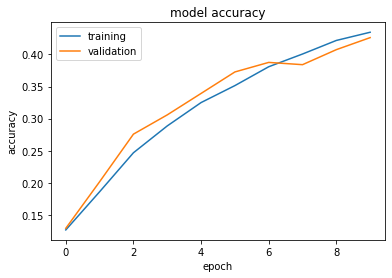

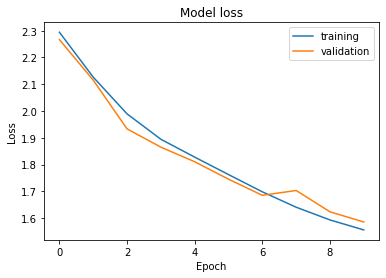

In [21]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

In [22]:
model2.evaluate(x_test_flatten,y_test)
model2.evaluate(x_train_flatten,y_train)

1563/1563 [==============================] - 17s 11ms/step - loss: 1.5336 - accuracy: 0.4400


[1.5335752964019775, 0.44001999497413635]

# Using optimiser SGD
SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum.

The default learning rate is 0.01 and no momentum is used by default.

## Activation funcation - Relu,Softmax,Selu,Softplus

### Scaled Exponential Linear Unit (SELU)
if x > 0: return scale * x

if x < 0: return scale * alpha * (exp(x) - 1)

where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098)

Basically, the SELU activation function multiplies scale (> 1) 
 

Epoch 1/10
1094/1094 [==============================] - 34s 31ms/step - loss: 2.3020 - accuracy: 0.1055 - val_loss: 2.2900 - val_accuracy: 0.1789
Epoch 2/10
1094/1094 [==============================] - 32s 30ms/step - loss: 2.2434 - accuracy: 0.1756 - val_loss: 2.0482 - val_accuracy: 0.2119
Epoch 3/10
1094/1094 [==============================] - 32s 30ms/step - loss: 2.0197 - accuracy: 0.2317 - val_loss: 1.9468 - val_accuracy: 0.2683
Epoch 4/10
1094/1094 [==============================] - 32s 30ms/step - loss: 1.9050 - accuracy: 0.2866 - val_loss: 1.9606 - val_accuracy: 0.2897
Epoch 5/10
1094/1094 [==============================] - 32s 29ms/step - loss: 1.8363 - accuracy: 0.3274 - val_loss: 1.8537 - val_accuracy: 0.3049
Epoch 6/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.7691 - accuracy: 0.3493 - val_loss: 1.7241 - val_accuracy: 0.3749
Epoch 7/10
1094/1094 [==============================] - 31s 29ms/step - loss: 1.6951 - accuracy: 0.3801 - val_loss: 1.6956 -

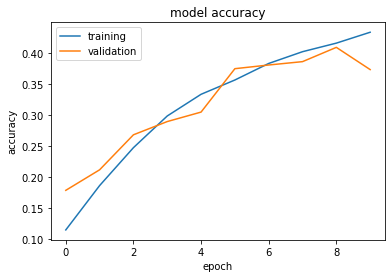

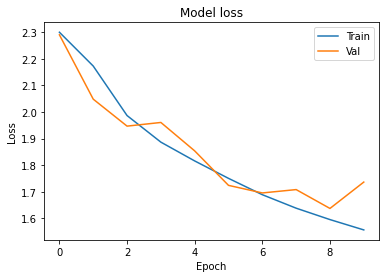

1563/1563 [==============================] - 15s 10ms/step - loss: 1.6825 - accuracy: 0.3876


[1.6824520826339722, 0.38763999938964844]

In [23]:
model3 = Sequential()

model3.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model3.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model3.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model3.add(Dense(units=32, activation='softplus',kernel_initializer='uniform'))
model3.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model3.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

history3= model3.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model3.evaluate(x_test_flatten,y_test)
model3.evaluate(x_train_flatten,y_train)

# Using optimiser ADAM¶
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


## Activation funcation - Relu,Softmax,Selu,Softplus¶
#### Scaled Exponential Linear Unit (SELU)
if x > 0: return scale * x

if x < 0: return scale * alpha * (exp(x) - 1)

where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098)

Basically, the SELU activation function multiplies scale (> 1)

Epoch 1/10
1094/1094 [==============================] - 39s 35ms/step - loss: 2.0411 - accuracy: 0.2282 - val_loss: 1.7939 - val_accuracy: 0.3517
Epoch 2/10
1094/1094 [==============================] - 40s 36ms/step - loss: 1.7703 - accuracy: 0.3588 - val_loss: 1.7331 - val_accuracy: 0.3785
Epoch 3/10
1094/1094 [==============================] - 38s 34ms/step - loss: 1.6816 - accuracy: 0.3887 - val_loss: 1.6820 - val_accuracy: 0.3913
Epoch 4/10
1094/1094 [==============================] - 38s 35ms/step - loss: 1.6203 - accuracy: 0.4136 - val_loss: 1.6346 - val_accuracy: 0.4133
Epoch 5/10
1094/1094 [==============================] - 40s 37ms/step - loss: 1.5654 - accuracy: 0.4371 - val_loss: 1.5802 - val_accuracy: 0.4326
Epoch 6/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.5175 - accuracy: 0.4499 - val_loss: 1.5641 - val_accuracy: 0.4427
Epoch 7/10
1094/1094 [==============================] - 37s 33ms/step - loss: 1.4642 - accuracy: 0.4772 - val_loss: 1.5491 -

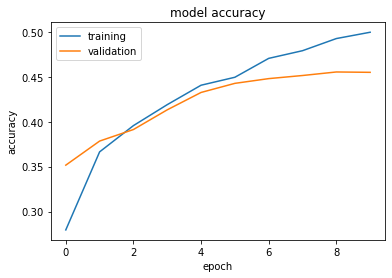

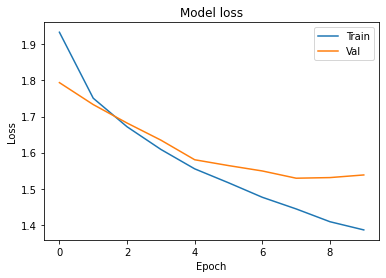

1563/1563 [==============================] - 17s 11ms/step - loss: 1.4156 - accuracy: 0.4916


[1.415582537651062, 0.49164000153541565]

In [24]:
model4 = Sequential()

model4.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model4.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model4.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model4.add(Dense(units=32, activation='softplus',kernel_initializer='uniform'))
model4.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model4.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history4= model4.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model4.evaluate(x_test_flatten,y_test)
model4.evaluate(x_train_flatten,y_train)

# Using optimiser RMSProp
RmsProp is an optimizer that utilizes the magnitude of recent gradients to normalize the gradients. We always keep a moving average over the root mean squared (hence Rms) gradients, by which we divide the current gradient.

## Activation funcation Relu,Selu,Elu & Softplus

Exponential Linear Unit(ELU) is a function that tend to converge cost to zero faster and produce more accurate results.Different to other activation functions, ELU has a extra alpha constant which should be positive number

Epoch 1/10
1094/1094 [==============================] - 77s 69ms/step - loss: 2.0735 - accuracy: 0.2138 - val_loss: 1.8696 - val_accuracy: 0.3206
Epoch 2/10
1094/1094 [==============================] - 74s 68ms/step - loss: 1.8084 - accuracy: 0.3474 - val_loss: 1.7872 - val_accuracy: 0.3650
Epoch 3/10
1094/1094 [==============================] - 69s 63ms/step - loss: 1.7129 - accuracy: 0.3850 - val_loss: 1.6693 - val_accuracy: 0.4013
Epoch 4/10
1094/1094 [==============================] - 73s 67ms/step - loss: 1.6461 - accuracy: 0.4119 - val_loss: 1.6564 - val_accuracy: 0.4080
Epoch 5/10
1094/1094 [==============================] - 74s 68ms/step - loss: 1.5900 - accuracy: 0.4332 - val_loss: 1.6465 - val_accuracy: 0.4065
Epoch 6/10
1094/1094 [==============================] - 76s 69ms/step - loss: 1.5458 - accuracy: 0.4508 - val_loss: 1.7285 - val_accuracy: 0.4013
Epoch 7/10
1094/1094 [==============================] - 76s 69ms/step - loss: 1.5266 - accuracy: 0.4549 - val_loss: 1.5437 -

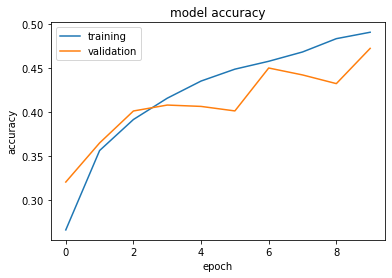

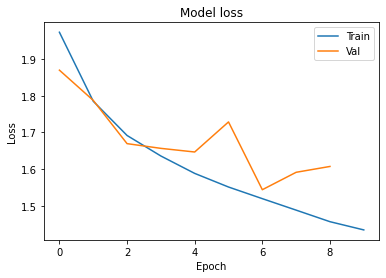

1563/1563 [==============================] - 17s 10ms/step - loss: nan - accuracy: 0.5035


[nan, 0.5034999847412109]

In [25]:
model5 = Sequential()

model5.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model5.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model5.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model5.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model5.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model5.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])

history5= model5.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model5.evaluate(x_test_flatten,y_test)
model5.evaluate(x_train_flatten,y_train)

# Using optimiser RMSProp

## Activation funcation Relu,Selu,Elu & Softmax

Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.

Epoch 1/10
1094/1094 [==============================] - 77s 67ms/step - loss: 2.0618 - accuracy: 0.2264 - val_loss: 1.8791 - val_accuracy: 0.3007
Epoch 2/10
1094/1094 [==============================] - 75s 68ms/step - loss: 1.7922 - accuracy: 0.3514 - val_loss: 1.7573 - val_accuracy: 0.3624
Epoch 3/10
1094/1094 [==============================] - 73s 66ms/step - loss: 1.6903 - accuracy: 0.3915 - val_loss: 1.6469 - val_accuracy: 0.4078
Epoch 4/10
1094/1094 [==============================] - 74s 68ms/step - loss: 1.6249 - accuracy: 0.4175 - val_loss: 1.7913 - val_accuracy: 0.3611
Epoch 5/10
1094/1094 [==============================] - 72s 66ms/step - loss: 1.5804 - accuracy: 0.4285 - val_loss: 1.6083 - val_accuracy: 0.4263
Epoch 6/10
1094/1094 [==============================] - 70s 64ms/step - loss: 1.5488 - accuracy: 0.4451 - val_loss: 1.6381 - val_accuracy: 0.4338
Epoch 7/10
1094/1094 [==============================] - 69s 63ms/step - loss: 1.5021 - accuracy: 0.4634 - val_loss: 1.5274 -

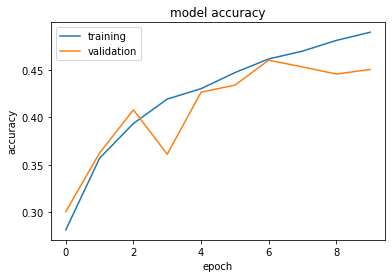

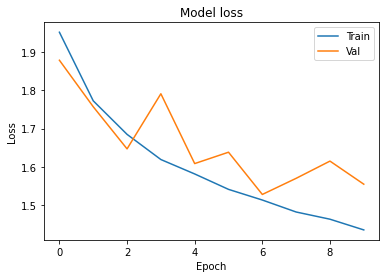

1563/1563 [==============================] - 14s 9ms/step - loss: 1.4583 - accuracy: 0.4772


[1.458276391029358, 0.4772000014781952]

In [26]:
model5_1 = Sequential()

model5_1.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model5_1.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model5_1.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model5_1.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model5_1.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model5_1.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])

history5_1= model5_1.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history5_1.history['accuracy'])
plt.plot(history5_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history5_1.history['loss'])
plt.plot(history5_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model5_1.evaluate(x_test_flatten,y_test)
model5_1.evaluate(x_train_flatten,y_train)

# Using Optimiser Adagrad

Adaptive Gradient Algorithm (Adagrad) is an algorithm for gradient-based optimization.It performs smaller updates As a result, it is well-suited when dealing with sparse data (NLP or image recognition) Each parameter has its own learning rate that improves performance on problems with sparse gradients.

## Activation funcation Relu,Selu,Elu & Softmax

Epoch 1/10
1094/1094 [==============================] - 39s 34ms/step - loss: 2.3011 - accuracy: 0.1142 - val_loss: 2.2944 - val_accuracy: 0.1234
Epoch 2/10
1094/1094 [==============================] - 36s 33ms/step - loss: 2.2904 - accuracy: 0.1272 - val_loss: 2.2655 - val_accuracy: 0.1649
Epoch 3/10
1094/1094 [==============================] - 36s 33ms/step - loss: 2.2414 - accuracy: 0.1697 - val_loss: 2.1422 - val_accuracy: 0.1785
Epoch 4/10
1094/1094 [==============================] - 36s 33ms/step - loss: 2.1182 - accuracy: 0.1858 - val_loss: 2.0717 - val_accuracy: 0.2296
Epoch 5/10
1094/1094 [==============================] - 38s 35ms/step - loss: 2.0563 - accuracy: 0.2320 - val_loss: 2.0383 - val_accuracy: 0.2414
Epoch 6/10
1094/1094 [==============================] - 36s 33ms/step - loss: 2.0200 - accuracy: 0.2470 - val_loss: 2.0063 - val_accuracy: 0.2616
Epoch 7/10
1094/1094 [==============================] - 38s 35ms/step - loss: 1.9933 - accuracy: 0.2709 - val_loss: 1.9722 -

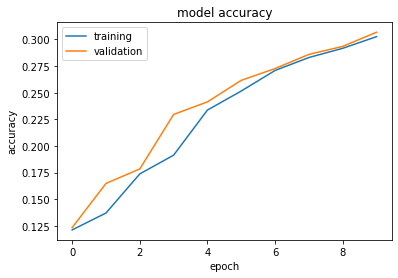

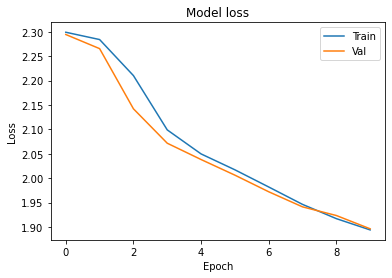

1563/1563 [==============================] - 14s 9ms/step - loss: 1.8854 - accuracy: 0.3082


[1.885422706604004, 0.30820000171661377]

In [27]:
model6 = Sequential()

model6.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model6.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model6.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model6.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model6.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model6.compile(optimizer="Adagrad", loss='categorical_crossentropy', metrics=['accuracy'])

history6= model6.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model6.evaluate(x_test_flatten,y_test)
model6.evaluate(x_train_flatten,y_train)

In [28]:
import tensorflow.compat.v1 as tf

# Using Optimiser Gradient Descent

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

## Activation funcation Relu,Selu,Elu & Softmax

Epoch 1/10
1094/1094 [==============================] - 31s 28ms/step - loss: 2.0935 - accuracy: 0.2109 - val_loss: 1.9365 - val_accuracy: 0.2964
Epoch 2/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.8085 - accuracy: 0.3443 - val_loss: 1.7005 - val_accuracy: 0.3849
Epoch 3/10
1094/1094 [==============================] - 2182s 2s/step - loss: 1.7038 - accuracy: 0.3889 - val_loss: 1.7570 - val_accuracy: 0.3627
Epoch 4/10
1094/1094 [==============================] - 33s 30ms/step - loss: 1.6445 - accuracy: 0.4078 - val_loss: 1.8396 - val_accuracy: 0.3495
Epoch 5/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.5977 - accuracy: 0.4263 - val_loss: 1.5889 - val_accuracy: 0.4339
Epoch 6/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.5415 - accuracy: 0.4462 - val_loss: 1.5862 - val_accuracy: 0.4369
Epoch 7/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.5022 - accuracy: 0.4572 - val_loss: 1.5998 -

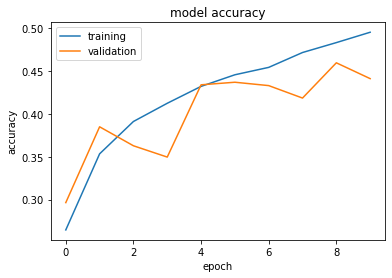

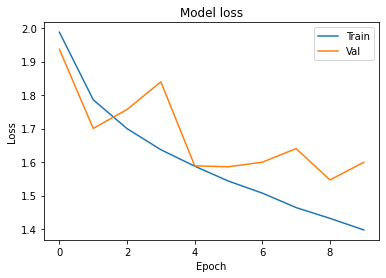

1563/1563 [==============================] - 13s 8ms/step - loss: 1.4566 - accuracy: 0.4790


[1.4565892219543457, 0.47901999950408936]

In [29]:
optimizer = tf.train.GradientDescentOptimizer(0.2)

model7 = Sequential()

model7.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model7.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model7.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model7.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model7.add(Dense(units=num_classes, activation='softmax',kernel_initializer='uniform'))

model7.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history7= model7.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model7.evaluate(x_test_flatten,y_test)
model7.evaluate(x_train_flatten,y_train)

# Using Optimiser Momentum Based Gradient Descent

SGD with momentum is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. It is one of the most popular optimization algorithms and many state-of-the-art models are trained using it.

## Activation funcation Relu,Selu,Elu & Softplus

Epoch 1/10
1094/1094 [==============================] - 36s 32ms/step - loss: 2.1616 - accuracy: 0.1671 - val_loss: 2.0850 - val_accuracy: 0.1627
Epoch 2/10
1094/1094 [==============================] - 34s 31ms/step - loss: 2.1294 - accuracy: 0.1694 - val_loss: 2.0593 - val_accuracy: 0.1903
Epoch 3/10
1094/1094 [==============================] - 34s 31ms/step - loss: 2.0841 - accuracy: 0.1791 - val_loss: 2.0805 - val_accuracy: 0.1790
Epoch 4/10
1094/1094 [==============================] - 34s 31ms/step - loss: 2.1956 - accuracy: 0.1542 - val_loss: 2.2252 - val_accuracy: 0.1029
Epoch 5/10
1094/1094 [==============================] - 35s 32ms/step - loss: 2.1473 - accuracy: 0.1546 - val_loss: 2.0540 - val_accuracy: 0.1878
Epoch 6/10
1094/1094 [==============================] - 35s 32ms/step - loss: 2.1575 - accuracy: 0.1494 - val_loss: 2.3031 - val_accuracy: 0.0979
Epoch 7/10
1094/1094 [==============================] - 27s 25ms/step - loss: 2.3034 - accuracy: 0.1011 - val_loss: 2.3029 -

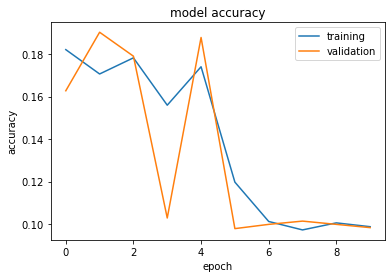

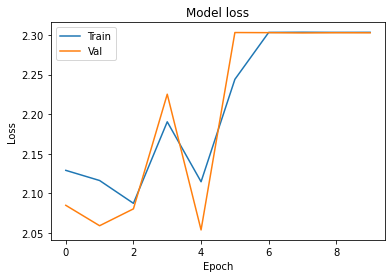

1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.1000


[2.302706480026245, 0.10000000149011612]

In [30]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model8 = Sequential()

model8.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model8.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model8.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model8.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model8.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history8= model8.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model8.evaluate(x_test_flatten,y_test)
model8.evaluate(x_train_flatten,y_train)

# Using Optimiser Mini-Batch Gradient Descent

Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

## Activation funcation Relu,Selu,Elu & Softplus

Epoch 1/10
274/274 [==============================] - 15s 50ms/step - loss: 2.0915 - accuracy: 0.2071 - val_loss: 1.8769 - val_accuracy: 0.3125
Epoch 2/10
274/274 [==============================] - 13s 46ms/step - loss: 1.8178 - accuracy: 0.3346 - val_loss: 1.7547 - val_accuracy: 0.3601
Epoch 3/10
274/274 [==============================] - 12s 44ms/step - loss: 1.7020 - accuracy: 0.3819 - val_loss: 1.6888 - val_accuracy: 0.3917
Epoch 4/10
274/274 [==============================] - 12s 42ms/step - loss: 1.6267 - accuracy: 0.4128 - val_loss: 1.6361 - val_accuracy: 0.4030
Epoch 5/10
274/274 [==============================] - 13s 47ms/step - loss: 1.5670 - accuracy: 0.4341 - val_loss: 1.5714 - val_accuracy: 0.4399
Epoch 6/10
274/274 [==============================] - 12s 43ms/step - loss: 1.5206 - accuracy: 0.4531 - val_loss: 1.5532 - val_accuracy: 0.4491
Epoch 7/10
274/274 [==============================] - 13s 46ms/step - loss: 1.4650 - accuracy: 0.4687 - val_loss: 1.5598 - val_accuracy:

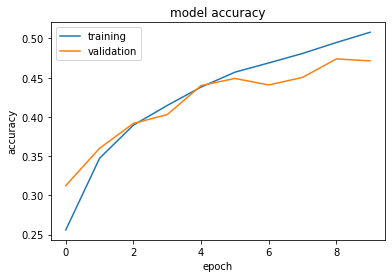

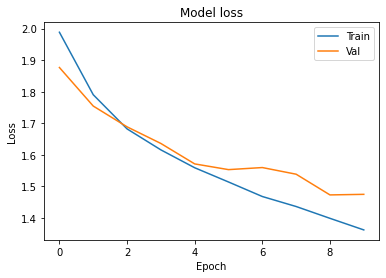

1563/1563 [==============================] - 13s 8ms/step - loss: 1.3657 - accuracy: 0.5092


[1.3656995296478271, 0.5092399716377258]

In [32]:
model9 = Sequential()

model9.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model9.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model9.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model9.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model9.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model9.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history9= model9.fit(x_train_flatten, y_train, epochs=10,batch_size= 128,validation_split=.3)

plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model9.evaluate(x_test_flatten,y_test)
model9.evaluate(x_train_flatten,y_train)

# Using Optimiser Nesterov Accelerated Gradient

Nesterov Accelerated Gradient method consists of a gradient descent step, followed by something that looks a lot like a momentum term, but isn't exactly the same as that found in classical momentum

## Activation funcation Relu,Selu,Elu & Softplus

Epoch 1/10
1094/1094 [==============================] - 27s 22ms/step - loss: 2.2977 - accuracy: 0.1306 - val_loss: 2.2232 - val_accuracy: 0.1776
Epoch 2/10
1094/1094 [==============================] - 31s 28ms/step - loss: 2.1406 - accuracy: 0.1865 - val_loss: 2.0387 - val_accuracy: 0.2195
Epoch 3/10
1094/1094 [==============================] - 28s 26ms/step - loss: 2.0162 - accuracy: 0.2430 - val_loss: 1.9239 - val_accuracy: 0.2851
Epoch 4/10
1094/1094 [==============================] - 25s 23ms/step - loss: 1.8971 - accuracy: 0.2964 - val_loss: 1.8609 - val_accuracy: 0.3171
Epoch 5/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.8316 - accuracy: 0.3245 - val_loss: 1.9516 - val_accuracy: 0.2916
Epoch 6/10
1094/1094 [==============================] - 21s 19ms/step - loss: 1.7740 - accuracy: 0.3515 - val_loss: 1.7246 - val_accuracy: 0.3779
Epoch 7/10
1094/1094 [==============================] - 21s 19ms/step - loss: 1.7022 - accuracy: 0.3779 - val_loss: 1.7304 -

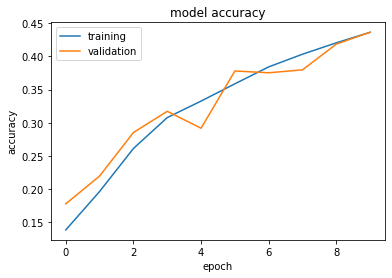

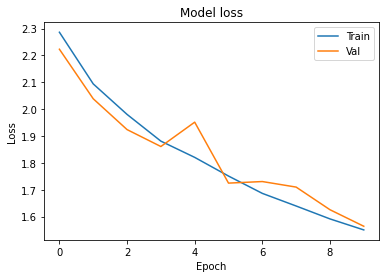

1563/1563 [==============================] - 10s 6ms/step - loss: 1.5160 - accuracy: 0.4495


[1.5159720182418823, 0.44947999715805054]

In [31]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD")

model10 = Sequential()

model10.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model10.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model10.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model10.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model10.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history10= model10.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model10.evaluate(x_test_flatten,y_test)
model10.evaluate(x_train_flatten,y_train)

# Using Optimiser Adam

## Activation funcation Relu,Selu,Elu & Softplus

## Dropout 
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference.

## Batch normalization
Batch normalization is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network.discover how to use batch normalization to accelerate the training of deep learning neural networks in Python with Keras

Epoch 1/10
1094/1094 [==============================] - 34s 28ms/step - loss: 1.9861 - accuracy: 0.2653 - val_loss: 1.8465 - val_accuracy: 0.3303
Epoch 2/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.8264 - accuracy: 0.3349 - val_loss: 1.7975 - val_accuracy: 0.3344
Epoch 3/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.8179 - accuracy: 0.3427 - val_loss: 1.7657 - val_accuracy: 0.3669
Epoch 4/10
1094/1094 [==============================] - 32s 30ms/step - loss: 1.7865 - accuracy: 0.3577 - val_loss: 1.8050 - val_accuracy: 0.3618
Epoch 5/10
1094/1094 [==============================] - 32s 30ms/step - loss: 1.7678 - accuracy: 0.3608 - val_loss: 1.6877 - val_accuracy: 0.3914
Epoch 6/10
1094/1094 [==============================] - 31s 29ms/step - loss: 1.7487 - accuracy: 0.3695 - val_loss: 1.7742 - val_accuracy: 0.3479
Epoch 7/10
1094/1094 [==============================] - 33s 30ms/step - loss: 1.7402 - accuracy: 0.3730 - val_loss: 1.7226 -

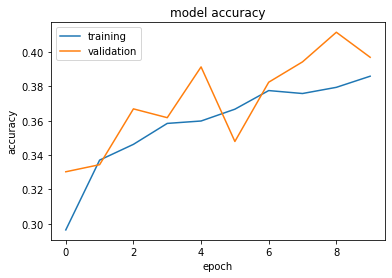

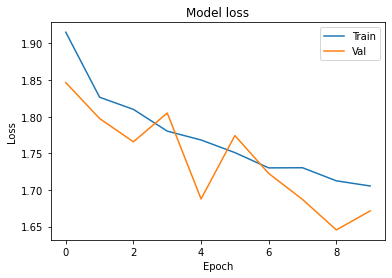

1563/1563 [==============================] - 12s 7ms/step - loss: 1.6345 - accuracy: 0.4106


[1.634486436843872, 0.4106000065803528]

In [33]:
model_d = Sequential()

model_d.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model_d.add(Dropout(0.2))
model_d.add(BatchNormalization())
model_d.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model_d.add(Dropout(0.2))
model_d.add(BatchNormalization())
model_d.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model_d.add(Dropout(0.2))
model_d.add(BatchNormalization())
model_d.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model_d.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model_d.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history_d= model_d.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history_d.history['accuracy'])
plt.plot(history_d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model_d.evaluate(x_test_flatten,y_test)
model_d.evaluate(x_train_flatten,y_train)

In [34]:
model_d.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_56 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_57 (Dense)             (None, 128)             

# Using Optimiser Stochastic Gradient Descent (SGD)

## Activation funcation Relu,Selu,Elu & Softplus

## Dropout 
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference.

## Batch normalization
Batch normalization is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network.discover how to use batch normalization to accelerate the training of deep learning neural networks in Python with Keras

Epoch 1/10
1094/1094 [==============================] - 32s 25ms/step - loss: 2.2337 - accuracy: 0.1822 - val_loss: 1.9578 - val_accuracy: 0.2755
Epoch 2/10
1094/1094 [==============================] - 26s 23ms/step - loss: 1.9320 - accuracy: 0.2855 - val_loss: 1.8188 - val_accuracy: 0.3309
Epoch 3/10
1094/1094 [==============================] - 26s 24ms/step - loss: 1.8168 - accuracy: 0.3307 - val_loss: 1.7962 - val_accuracy: 0.3465
Epoch 4/10
1094/1094 [==============================] - 26s 24ms/step - loss: 1.7741 - accuracy: 0.3521 - val_loss: 1.7232 - val_accuracy: 0.3798
Epoch 5/10
1094/1094 [==============================] - 24s 22ms/step - loss: 1.7382 - accuracy: 0.3644 - val_loss: 1.7270 - val_accuracy: 0.3809
Epoch 6/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.7246 - accuracy: 0.3738 - val_loss: 1.7318 - val_accuracy: 0.3755
Epoch 7/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.7165 - accuracy: 0.3748 - val_loss: 1.6819 -

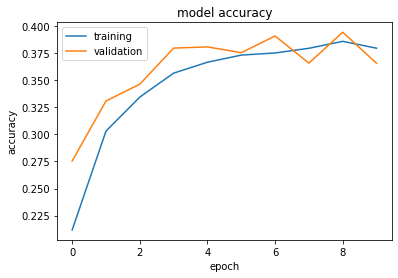

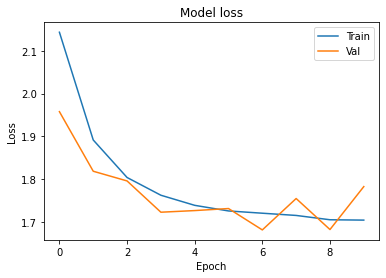

1563/1563 [==============================] - 12s 8ms/step - loss: 1.7422 - accuracy: 0.3767


[1.7421903610229492, 0.37672001123428345]

In [35]:
model_s = Sequential()

model_s.add(Dense(units=1024, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model_s.add(Dropout(0.2))
model_s.add(BatchNormalization())
model_s.add(Dense(units=512, activation='relu',kernel_initializer='uniform'))
model_s.add(Dropout(0.2))
model_s.add(BatchNormalization())
model_s.add(Dense(units=128, activation='selu',kernel_initializer='uniform'))
model_s.add(Dropout(0.2))
model_s.add(BatchNormalization())
model_s.add(Dense(units=32, activation='elu',kernel_initializer='uniform'))
model_s.add(Dense(units=num_classes, activation='softplus',kernel_initializer='uniform'))

model_s.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

history_s= model_s.fit(x_train_flatten, y_train, epochs=10,validation_split=.3)

plt.plot(history_s.history['accuracy'])
plt.plot(history_s.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history_s.history['loss'])
plt.plot(history_s.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()


model_s.evaluate(x_test_flatten,y_test)
model_s.evaluate(x_train_flatten,y_train)

In [36]:
model_s.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_61 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_62 (Dense)             (None, 128)             

## Mini-Batch Gradient Descent
Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Activation funcation Relu,Selu,Elu & Softplus

Test accuracy: 0.4790

Train accuracy: 0.5092